In [ ]:
# Packages

import numpy as np
import matplotlib.pyplot as plt
import time
from timeit import default_timer as timer

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the variables: -

gravity = 9.8
A_T = 80
A_S = 100
L = 500
c = 0.000
Q_tur = 0
Q_beginning = 300

time = 1000
delta_time = 1

In [ ]:
def dQ_dt(z, Q):
    return gravity*A_T*( -z-c*Q*abs(Q) )/L

def dz_dt(Q):
    return (Q-Q_tur)/A_S

In [ ]:
def euler_method(f, g, x0, y0, z0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0

    for i in range(n - 1):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h*g(z[i])
        z[i+1] = z[i] + h*f(y[i], z[i])

    return x, y


def runge_kutta_4Order(f, g, x0, y0, z0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0

    for i in range(n - 1):
        k1 = h * g(z[i])
        l1 = h * f(y[i], z[i])
        k2 = h * g(z[i] + 0.5*l1)
        l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)
        k3 = h * g(z[i] + 0.5*l2)
        l3 = h * f(y[i] + 0.5*k2, z[i] + 0.5*l2)
        k4 = h * g(z[i] + l3)
        l4 = h * f(y[i] + k3, z[i] + l3)

        x[i+1] = x[i] + h
        y[i+1] = y[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        z[i+1] = z[i] + (1/6) * (l1 + 2*l2 + 2*l3 + l4)

    return x, y

def runge_kutta_3Order(f, g, x0, y0, z0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0

    for i in range(n - 1):
        k1 = h * g(z[i])
        l1 = h * f(y[i], z[i])
        k2 = h * g(z[i] + 0.5*l1)
        l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)
        k3 = h * g(z[i] - l1 + 2*l2)
        l3 = h * f(y[i] + k2, z[i] + l2)

        x[i+1] = x[i] + h
        y[i+1] = y[i] + (1/6) * (k1 + 4*k2 + k3)
        z[i+1] = z[i] + (1/6) * (l1 + 4*l2 + l3)

    return x, y

def runge_kutta_2Order(f, g, x0, y0, z0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0

    for i in range(n - 1):
        k1 = h * g(z[i])
        l1 = h * f(y[i], z[i])
        k2 = h * g(z[i] + 0.5*l1)
        l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)

        x[i+1] = x[i] + h
        y[i+1] = y[i] + k2
        z[i+1] = z[i] + l2

    return x, y

In [ ]:
# initial conditions
t0 = 0
z0 = 0
Q0 = Q_beginning


# step size and number of steps
h = delta_time
# n = 1000

tf = time # final x value
n = int((tf - t0) / h) # number of steps

# Eulers Method
start_time = timer()
x_em , y_em = euler_method(dQ_dt, dz_dt, t0, z0, Q0, h, n)
end_time = timer()
t_em = end_time - start_time

# Runge-Kutta 4 Order
start_time = timer()
x_rk4 , y_rk4 = runge_kutta_4Order(dQ_dt, dz_dt, t0, z0, Q0, h, n)
end_time = timer()
t_rk4 = end_time - start_time

# Runge-Kutta 3 Order
start_time = timer()
x_rk3 , y_rk3 = runge_kutta_3Order(dQ_dt, dz_dt, t0, z0, Q0, h, n)
end_time = timer()
t_rk3 = end_time - start_time

# Runge-Kutta 2 Order
start_time = timer()
x_rk2 , y_rk2 = runge_kutta_2Order(dQ_dt, dz_dt, t0, z0, Q0, h, n)
end_time = timer()
t_rk2 = end_time - start_time

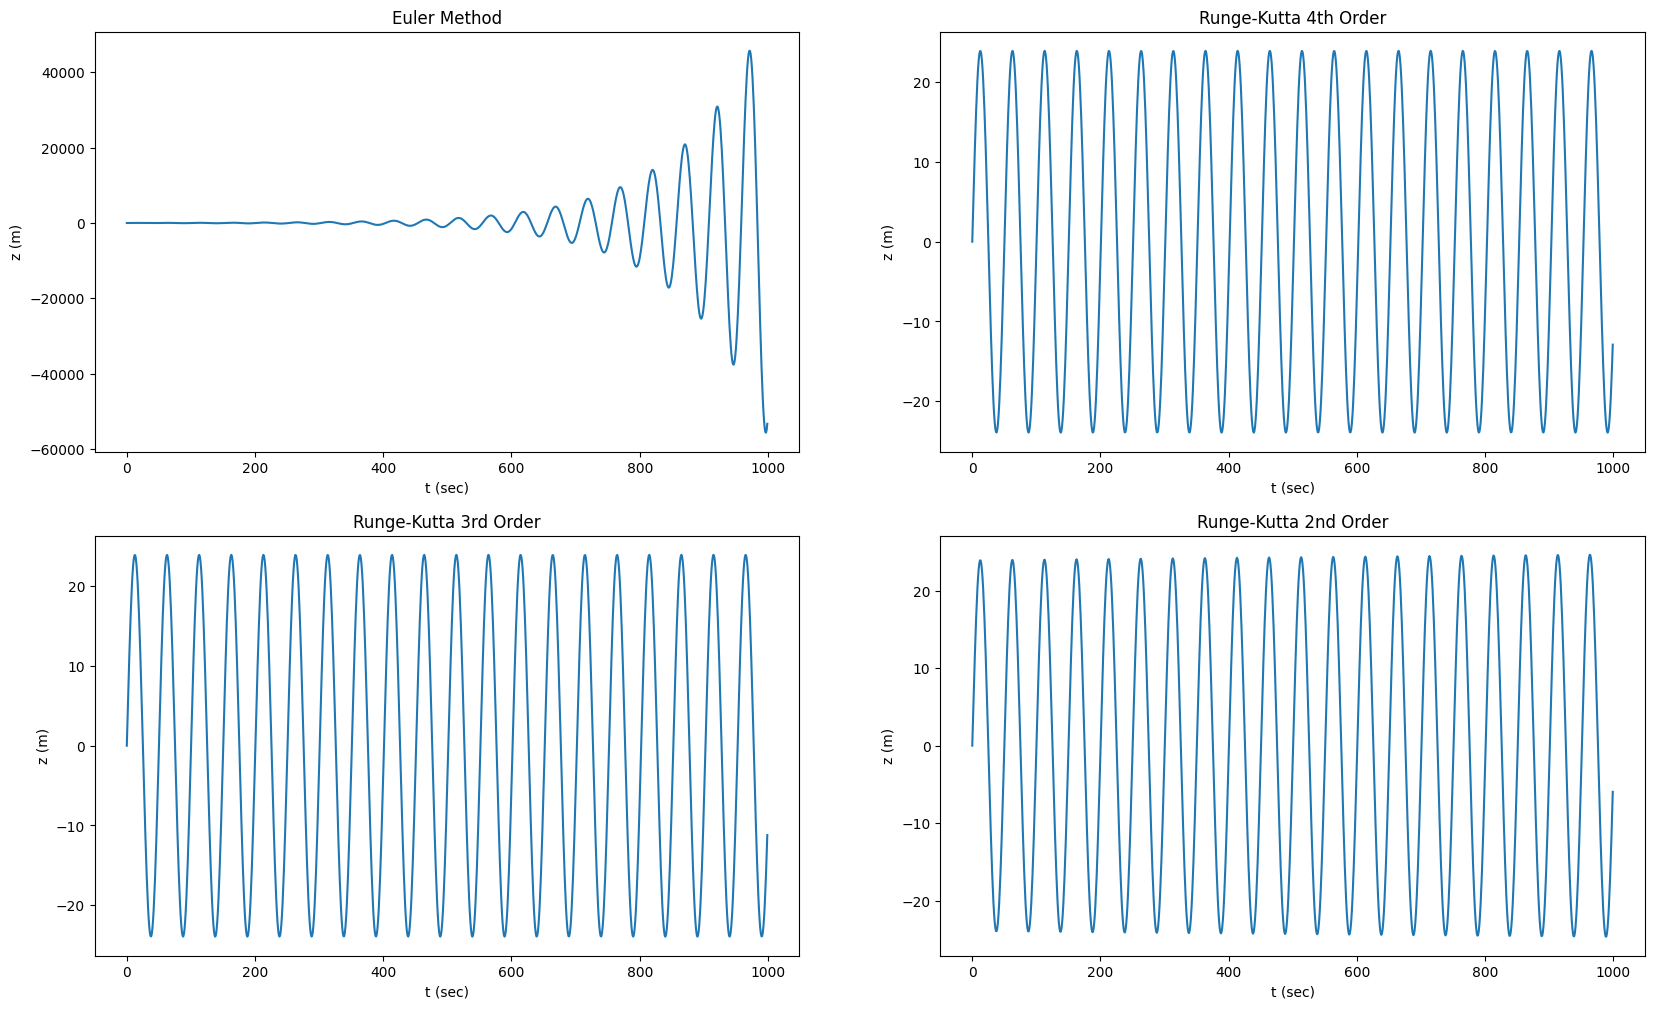

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2, 2, 1)
plt.plot(x_em, y_em)
plt.title("Euler Method")
plt.xlabel('t (sec)')
plt.ylabel('z (m)')


plt.subplot(2, 2, 2)
plt.plot(x_rk4, y_rk4)
plt.title("Runge-Kutta 4th Order")
plt.xlabel('t (sec)')
plt.ylabel('z (m)')

plt.subplot(2, 2, 3)
plt.plot(x_rk3, y_rk3)
plt.title("Runge-Kutta 3rd Order")
plt.xlabel('t (sec)')
plt.ylabel('z (m)')

plt.subplot(2, 2, 4)
plt.plot(x_rk2, y_rk2)
plt.title("Runge-Kutta 2nd Order")
plt.xlabel('t (sec)')
plt.ylabel('z (m)')

plt.savefig("/content/drive/MyDrive/Colab Notebooks/plot1.jpg", dpi=300)
plt.show()


In [ ]:
from tabulate import tabulate

table = list( zip(x_em, y_em, y_rk4, y_rk3, y_rk2) )
print(tabulate(table, headers=["Time", "Eluer Method", "Runge-Kutta 4th Order", "Runge-Kutta 3rd Order", "Runge-Kutta 2nd Order"]))

  Time    Eluer Method    Runge-Kutta 4th Order    Runge-Kutta 3rd Order    Runge-Kutta 2nd Order
------  --------------  -----------------------  -----------------------  -----------------------
     0        0                       0                        0                        0
     1        3                       2.99216                  2.99216                  3
     2        6                       5.93746                  5.9374                   5.95296
     3        8.95296                 8.78979                  8.78955                  8.81239
     4       11.8118                 11.5045                  11.5039                  11.5333
     5       14.5303                 14.039                   14.0378                  14.0728
     6       17.0636                 16.3537                  16.3516                  16.3909
     7       19.3691                 18.4123                  18.4091                  18.4512
     8       21.407                  20.1826        

In [ ]:
import pandas as pd

df = pd.DataFrame({"Time": x_em, "Eluer Method": y_em, "Runge-Kutta 4th Order": y_rk4, "Runge-Kutta 3rd Order": y_rk3, "Runge-Kutta 2nd Order": y_rk2})

print(df.to_string(index=False))

 Time  Eluer Method  Runge-Kutta 4th Order  Runge-Kutta 3rd Order  Runge-Kutta 2nd Order
  0.0      0.000000               0.000000               0.000000               0.000000
  1.0      3.000000               2.992160               2.992160               3.000000
  2.0      6.000000               5.937464               5.937403               5.952960
  3.0      8.952960               8.789791               8.789547               8.812393
  4.0     11.811840              11.504474              11.503871              11.533282
  5.0     14.530338              14.039003              14.037814              14.072788
  6.0     17.063626              16.353689              16.351643              16.390923
  7.0     19.369078              18.412285              18.409078              18.451183
  8.0     21.406972              20.182554              20.177857              20.221122
  9.0     23.141160              21.636775              21.630247              21.672859
 10.0     24.539686  

In [ ]:
from openpyxl import Workbook

# create a new Excel workbook
workbook = Workbook()

# get the active worksheet
worksheet = workbook.active

# define the data as a 2D array
data = [["Name", "Age", "City"],
        ["Alice", 25, "New York"],
        ["Bob", 30, "Paris"],
        ["Charlie", 35, "London"]]

# write the data to the worksheet
for row in table:
    worksheet.append(row)

# save the workbook to a file
workbook.save("/content/drive/MyDrive/Colab Notebooks/example.xlsx")


Elapsed time EM: 0.005027315000006638
Elapsed time RK4: 0.022789088000081392
Elapsed time RK3: 0.014298664999842003
Elapsed time RK2: 0.00979993500004639


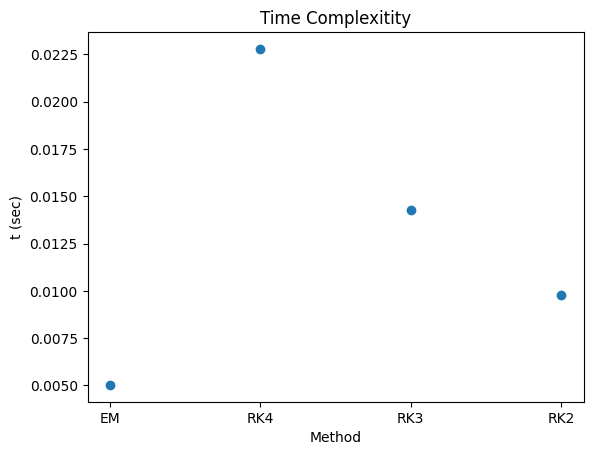

In [ ]:
# Time Complexitity

print("Elapsed time EM:", t_em)
print("Elapsed time RK4:", t_rk4)
print("Elapsed time RK3:", t_rk3)
print("Elapsed time RK2:", t_rk2)

plt.plot(["EM", "RK4", "RK3", "RK2"], [t_em, t_rk4, t_rk3, t_rk2], 'o')
plt.title("Time Complexitity")
plt.xlabel('Method')
plt.ylabel('t (sec)')
plt.show()

Data:  13
x_experimental:  [3, 8, 12, 16, 20, 24, 29, 34, 39, 44, 49, 52, 57]
y_experimental:  [4923, 5075, 4923, 4832, 4923, 4989, 4923, 4877, 4923, 4961, 4923, 4897, 4923]


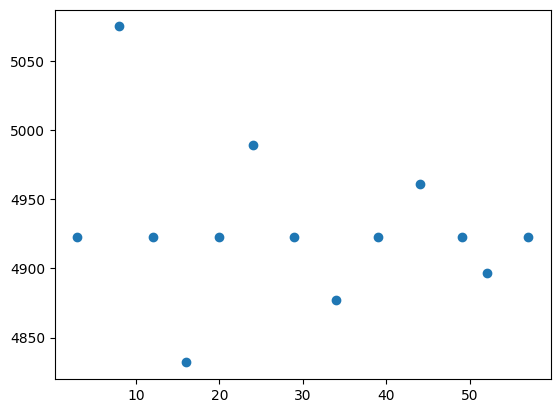

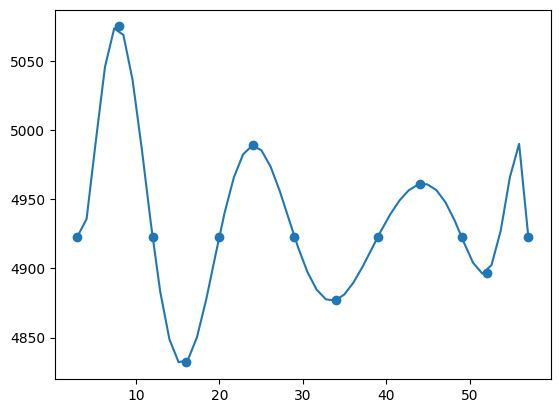

In [ ]:
x_experimental = [3, 8, 12, 16, 20, 24, 29, 34, 39, 44, 49, 52, 57]
y_experimental = [4923, 5075, 4923, 4832, 4923, 4989, 4923, 4877, 4923, 4961, 4923, 4897, 4923]

numberOfData = len(x_experimental)

print("Data: ", numberOfData)
print("x_experimental: ", x_experimental)
print("y_experimental: ", y_experimental)

# Plot the points
plt.plot(x_experimental, y_experimental, 'o')

# Show the plot
plt.show()

coefficients = np.polyfit(x_experimental, y_experimental, (numberOfData-1))
polynomial = np.poly1d(coefficients)

# Create an array of x values for the polynomial line
x_line = np.linspace(x_experimental[0], x_experimental[numberOfData-1])

# Plot the points
plt.scatter(x_experimental, y_experimental)

# Plot the polynomial line
plt.plot(x_line, polynomial(x_line))

# Show the plot
plt.show()

In [ ]:
# def euler_method(f, g, x0, y0, z0, h, n):
#     x = np.zeros(n)
#     y = np.zeros(n)
#     z = np.zeros(n)
#     y[0] = y0
#     z[0] = z0

#     for i in range(n - 1):
#         x[i+1] = x[i] + h
#         z[i+1] = z[i] + h*f(y[i], z[i])

#         y[i+1] = y[i] + h*g(z[i+1])

#     return x, y


# def runge_kutta_4Order(f, g, x0, y0, z0, h, n):
#     x = np.zeros(n)
#     y = np.zeros(n)
#     z = np.zeros(n)
#     y[0] = y0
#     z[0] = z0

#     for i in range(n - 1):

#         l1 = h * f(y[i], z[i])
#         l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)
#         l3 = h * f(y[i] + 0.5*k2, z[i] + 0.5*l2)
#         l4 = h * f(y[i] + k3, z[i] + l3)

#         x[i+1] = x[i] + h
#         z[i+1] = z[i] + (1/6) * (l1 + 2*l2 + 2*l3 + l4)

#         k1 = h * g(z[i+1])
#         k2 = h * g(z[i+1] + 0.5*l1)
#         k3 = h * g(z[i+1] + 0.5*l2)
#         k4 = h * g(z[i+1] + l3)

#         y[i+1] = y[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)

#     return x, y

# def runge_kutta_3Order(f, g, x0, y0, z0, h, n):
#     x = np.zeros(n)
#     y = np.zeros(n)
#     z = np.zeros(n)
#     y[0] = y0
#     z[0] = z0

#     for i in range(n - 1):
#         l1 = h * f(y[i], z[i])
#         l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)
#         l3 = h * f(y[i] + k2, z[i] + l2)

#         x[i+1] = x[i] + h
#         z[i+1] = z[i] + (1/6) * (l1 + 4*l2 + l3)

#         k1 = h * g(z[i+1])
#         k2 = h * g(z[i+1] + 0.5*l1)
#         k3 = h * g(z[i+1] - l1 + 2*l2)

#         y[i+1] = y[i] + (1/6) * (k1 + 4*k2 + k3)

#     return x, y

# def runge_kutta_2Order(f, g, x0, y0, z0, h, n):
#     x = np.zeros(n)
#     y = np.zeros(n)
#     z = np.zeros(n)
#     y[0] = y0
#     z[0] = z0

#     for i in range(n - 1):
#         l1 = h * f(y[i], z[i])
#         l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)

#         x[i+1] = x[i] + h
#         z[i+1] = z[i] + l2

#         k1 = h * g(z[i+1])
#         k2 = h * g(z[i+1] + 0.5*l1)

#         y[i+1] = y[i] + k2

#     return x, y

In [ ]:
# # initial conditions
# t0 = 0
# z0 = 0
# Q0 = Q_beginning


# # step size and number of steps
# h = delta_time
# # n = 1000

# tf = time # final x value
# n = int((tf - t0) / h) # number of steps

# # Eulers Method
# start_time = timer()
# x_em , y_em = euler_method(dQ_dt, dz_dt, t0, z0, Q0, h, n)
# end_time = timer()
# t_em = end_time - start_time

# # Runge-Kutta 4 Order
# start_time = timer()
# x_rk4 , y_rk4 = runge_kutta_4Order(dQ_dt, dz_dt, t0, z0, Q0, h, n)
# end_time = timer()
# t_rk4 = end_time - start_time

# # Runge-Kutta 3 Order
# start_time = timer()
# x_rk3 , y_rk3 = runge_kutta_3Order(dQ_dt, dz_dt, t0, z0, Q0, h, n)
# end_time = timer()
# t_rk3 = end_time - start_time

# # Runge-Kutta 2 Order
# start_time = timer()
# x_rk2 , y_rk2 = runge_kutta_2Order(dQ_dt, dz_dt, t0, z0, Q0, h, n)
# end_time = timer()
# t_rk2 = end_time - start_time

In [ ]:
# plt.figure(figsize=(20,12))

# plt.subplot(2, 2, 1)
# plt.plot(x_em, y_em)
# plt.title("Euler Method")
# plt.xlabel('t (sec)')
# plt.ylabel('z (m)')


# plt.subplot(2, 2, 2)
# plt.plot(x_rk4, y_rk4)
# plt.title("Runge-Kutta 4th Order")
# plt.xlabel('t (sec)')
# plt.ylabel('z (m)')

# plt.subplot(2, 2, 3)
# plt.plot(x_rk3, y_rk3)
# plt.title("Runge-Kutta 3rd Order")
# plt.xlabel('t (sec)')
# plt.ylabel('z (m)')

# plt.subplot(2, 2, 4)
# plt.plot(x_rk2, y_rk2)
# plt.title("Runge-Kutta 2nd Order")
# plt.xlabel('t (sec)')
# plt.ylabel('z (m)')

# plt.show()plt.figure(figsize=(20,12))

# plt.subplot(2, 2, 1)
# plt.plot(x_em, y_em)
# plt.title("Euler Method")
# plt.xlabel('t (sec)')
# plt.ylabel('z (m)')


# plt.subplot(2, 2, 2)
# plt.plot(x_rk4, y_rk4)
# plt.title("Runge-Kutta 4th Order")
# plt.xlabel('t (sec)')
# plt.ylabel('z (m)')

# plt.subplot(2, 2, 3)
# plt.plot(x_rk3, y_rk3)
# plt.title("Runge-Kutta 3rd Order")
# plt.xlabel('t (sec)')
# plt.ylabel('z (m)')

# plt.subplot(2, 2, 4)
# plt.plot(x_rk2, y_rk2)
# plt.title("Runge-Kutta 2nd Order")
# plt.xlabel('t (sec)')
# plt.ylabel('z (m)')

# plt.show()

In this implementation, we define the functions euler_method, f, and g. The function euler_method takes the differential equation as an input and uses Euler's method to solve it. The function f represents the right-hand side of the differential equation dz/dx = f(y, z), and g represents the right-hand side of the differential equation dy/dx = g(z).

To use the euler_method function, we need to specify the initial conditions x0, y0, and z0, as well as the step size h and the number of steps n.

Finally, we plot the solution using matplotlib. The resulting plot should show the solution of the differential equation over the range of x values from x0 to x0 + h*n.

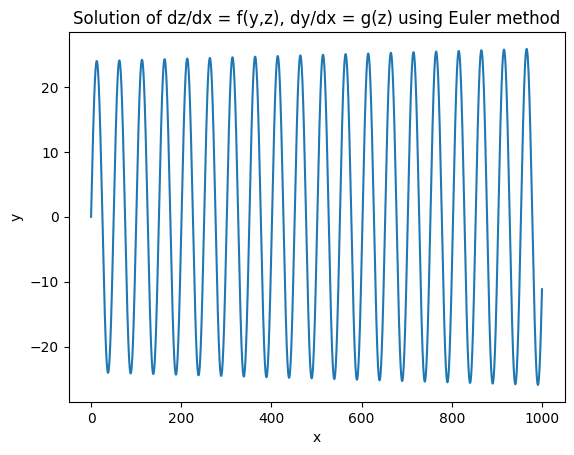

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, g, x0, y0, z0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0

    for i in range(n - 1):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h*g(z[i])
        z[i+1] = z[i] + h*f(y[i], z[i])

    return x, y

def f(y, z):
    # return z**2 - y
    return gravity*A_T*( -y-c*z*abs(z) )/L

def g(z):
    # return -2*z
    return (z-Q_tur)/A_S

# initial conditions
x0 = 0
y0 = 0
z0 = Q_beginning


# step size and number of steps
h = 0.01
# n = 1000

xf = 1000 # final x value
n = int((xf - x0) / h) # number of steps

# solve the differential equation using Euler's method
x, y = euler_method(f, g, x0, y0, z0, h, n)

# plot the solution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of dz/dx = f(y,z), dy/dx = g(z) using Euler method')
plt.show()


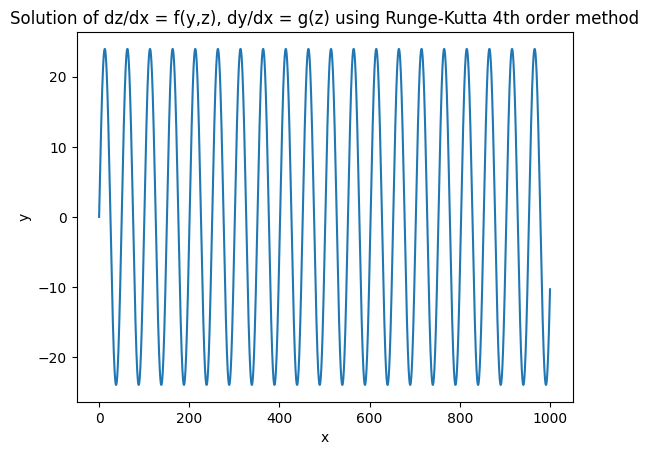

In [ ]:
def runge_kutta(f, g, x0, y0, z0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0

    for i in range(n - 1):
        k1 = h * g(z[i])
        l1 = h * f(y[i], z[i])
        k2 = h * g(z[i] + 0.5*l1)
        l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)
        k3 = h * g(z[i] + 0.5*l2)
        l3 = h * f(y[i] + 0.5*k2, z[i] + 0.5*l2)
        k4 = h * g(z[i] + l3)
        l4 = h * f(y[i] + k3, z[i] + l3)

        x[i+1] = x[i] + h
        y[i+1] = y[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        z[i+1] = z[i] + (1/6) * (l1 + 2*l2 + 2*l3 + l4)

    return x, y

# def f(y, z):
#     return z**2 - y

# def g(z):
#     return -2*z

# # initial conditions
# x0 = 0
# y0 = 1
# z0 = 0

# # step size and number of steps
# h = 0.01
# n = 1000

# solve the differential equation using Runge-Kutta 4th order method
x, y = runge_kutta(f, g, x0, y0, z0, h, n)

# plot the solution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of dz/dx = f(y,z), dy/dx = g(z) using Runge-Kutta 4th order method')
plt.show()


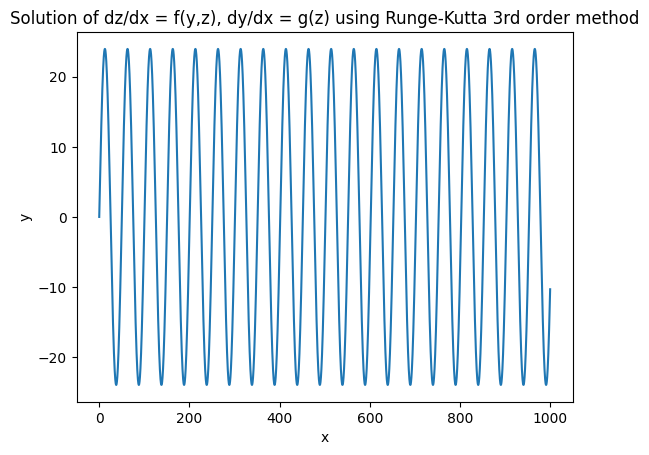

In [ ]:
def runge_kutta(f, g, x0, y0, z0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0

    for i in range(n - 1):
        k1 = h * g(z[i])
        l1 = h * f(y[i], z[i])
        k2 = h * g(z[i] + 0.5*l1)
        l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)
        k3 = h * g(z[i] - l1 + 2*l2)
        l3 = h * f(y[i] + k2, z[i] + l2)

        x[i+1] = x[i] + h
        y[i+1] = y[i] + (1/6) * (k1 + 4*k2 + k3)
        z[i+1] = z[i] + (1/6) * (l1 + 4*l2 + l3)

    return x, y

# def f(y, z):
#     return z**2 - y

# def g(z):
#     return -2*z

# # initial conditions
# x0 = 0
# y0 = 1
# z0 = 0

# # step size and number of steps
# h = 0.01
# n = 1000

# solve the differential equation using Runge-Kutta 3rd order method
x, y = runge_kutta(f, g, x0, y0, z0, h, n)

# plot the solution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of dz/dx = f(y,z), dy/dx = g(z) using Runge-Kutta 3rd order method')
plt.show()


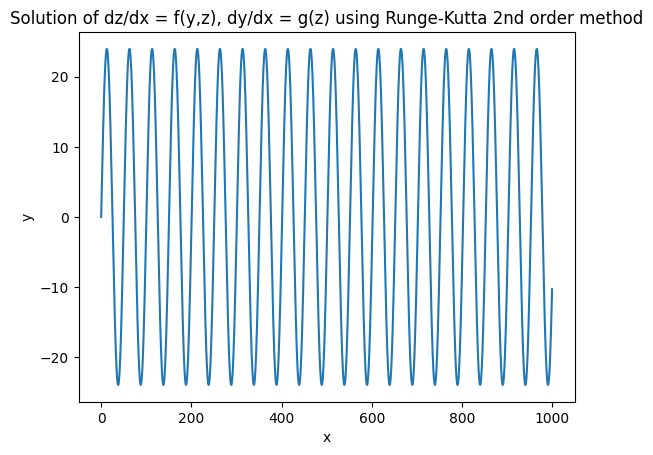

In [ ]:
def runge_kutta(f, g, x0, y0, z0, h, n):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    y[0] = y0
    z[0] = z0

    for i in range(n - 1):
        k1 = h * g(z[i])
        l1 = h * f(y[i], z[i])
        k2 = h * g(z[i] + 0.5*l1)
        l2 = h * f(y[i] + 0.5*k1, z[i] + 0.5*l1)

        x[i+1] = x[i] + h
        y[i+1] = y[i] + k2
        z[i+1] = z[i] + l2

    return x, y

# def f(y, z):
#     return z**2 - y

# def g(z):
#     return -2*z

# # initial conditions
# x0 = 0
# y0 = 1
# z0 = 0

# # step size and number of steps
# h = 0.01
# n = 1000

# solve the differential equation using Runge-Kutta 2nd order method
x, y = runge_kutta(f, g, x0, y0, z0, h, n)

# plot the solution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of dz/dx = f(y,z), dy/dx = g(z) using Runge-Kutta 2nd order method')
plt.show()
